# Validation, Cross-Validation, and the Bootstrap  
From Introduction to Statistical Learning

In [2]:
# Import necessary libraries
library(ISLR)
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [8]:
# Set seed, for reproducability
set.seed(1)

Use the `sample()` function to split the observations into two halves. We select 196 observations out of the full set of 392. The function returns a vector of 192 random numbers between 1 and 392, in random order. These will be used as indices to select specific rows of data as our training set.

In [9]:
train <- sample(392,196)

In [10]:
train

[1] 324 167 129 299 270 187 307  85 277 362 330 263 329  79 213  37 105 217
 [19] 366 165 290 383  89 289 340 326 382  42 111  20  44 343  70 121  40 172
 [37]  25 248 198  39 298 280 160  14 130  45  22 206 230 193 104 367 255 341
 [55] 342 103 331  13 296 375 176 279 110  84  29 141 252 221 108 304  33 347
 [73] 149 287 102 145 118 323 107  64 224 337  51 325 372 138 390 389 282 143
 [91] 285 170  48 204 295  24 181 214 225 163  43   1 328  78 284 116 233  61
[109]  86 374  49 242 246 247 239 219 135 364 363 310  53 348  65 376 124  77
[127] 218  98 194  19  31 174 237  75  16 358   9  50  92 122 152 386 207 244
[145] 229 350 355 391 223 373 309 140 126 349 344 319 258  15 271 388 195 201
[163] 318  17 212 127 133  41 384 392 159 117  72  36 315 294 157 378 313 306
[181] 272 106 185  88 281 228 238 368  80  30  93 234 220 240 369 164

Fit a linear regression model using just the observations corresponding to the training set.

In [7]:
lm.fit <- lm(mpg ~ 1 + horsepower, data = Auto, subset = train)

Now use the `predict()` function to estimate the response for all 392 observations, then use the `mean()` function to calculate the MSE of the 196 observations in the validation set to estimate true test error.

In [12]:
mean((Auto$mpg - predict(lm.fit, Auto))[-train]^2)
# -train indexing selects all the rows that weren't in the training set.

[1] 23.26601

We can use the `poly()` function to estimate the test error for higher order polynoomial regressions. (e.g., `lm(mpg ~ poly(horsepower,2), data = Auto, subset = train)` is the same as calling `lm(mpg ~ horsepower + I(horsepower^2), data = Auto, subset = train)`

In [14]:
lm.fit2 <- lm(mpg ~ poly(horsepower, 2), data = Auto, subset = train)
lm.fit3 <- lm(mpg ~ poly(horsepower, 3), data = Auto, subset = train)
summary(lm.fit)
summary(lm.fit2)
summary(lm.fit3)


Call:
lm(formula = mpg ~ 1 + horsepower, data = Auto, subset = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.3177 -3.5428 -0.5591  2.3910 14.6836 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 41.283548   1.044352   39.53   <2e-16 ***
horsepower  -0.169659   0.009556  -17.75   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.032 on 194 degrees of freedom
Multiple R-squared:  0.619,	Adjusted R-squared:  0.6171 
F-statistic: 315.2 on 1 and 194 DF,  p-value: < 2.2e-16



Call:
lm(formula = mpg ~ poly(horsepower, 2), data = Auto, subset = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.8711  -2.6655  -0.0096   2.0806  16.1063 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            23.5496     0.3175  74.182  < 2e-16 ***
poly(horsepower, 2)1 -123.5881     6.4587 -19.135  < 2e-16 ***
poly(horsepower, 2)2   47.7189     6.3613   7.501 2.25e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.439 on 193 degrees of freedom
Multiple R-squared:  0.705,	Adjusted R-squared:  0.702 
F-statistic: 230.6 on 2 and 193 DF,  p-value: < 2.2e-16



Call:
lm(formula = mpg ~ poly(horsepower, 3), data = Auto, subset = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.6625  -2.7108   0.0805   2.0724  16.1378 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            23.5527     0.3185  73.946  < 2e-16 ***
poly(horsepower, 3)1 -123.6143     6.4755 -19.089  < 2e-16 ***
poly(horsepower, 3)2   47.8284     6.3935   7.481 2.58e-12 ***
poly(horsepower, 3)3    1.3825     5.8107   0.238    0.812    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.45 on 192 degrees of freedom
Multiple R-squared:  0.7051,	Adjusted R-squared:  0.7005 
F-statistic:   153 on 3 and 192 DF,  p-value: < 2.2e-16


Make predictions for all three models and plot them all over the data.

In [ ]:
yhat1 <- predict(lm.fit, Auto)
yhat2 <- predict(lm.fit2, Auto)
yhat3 <- predict(lm.fit3, Auto)
auto.fit <- data.frame(Auto$horsepower, Auto$mpg, yhat1, yhat2, yhat3)

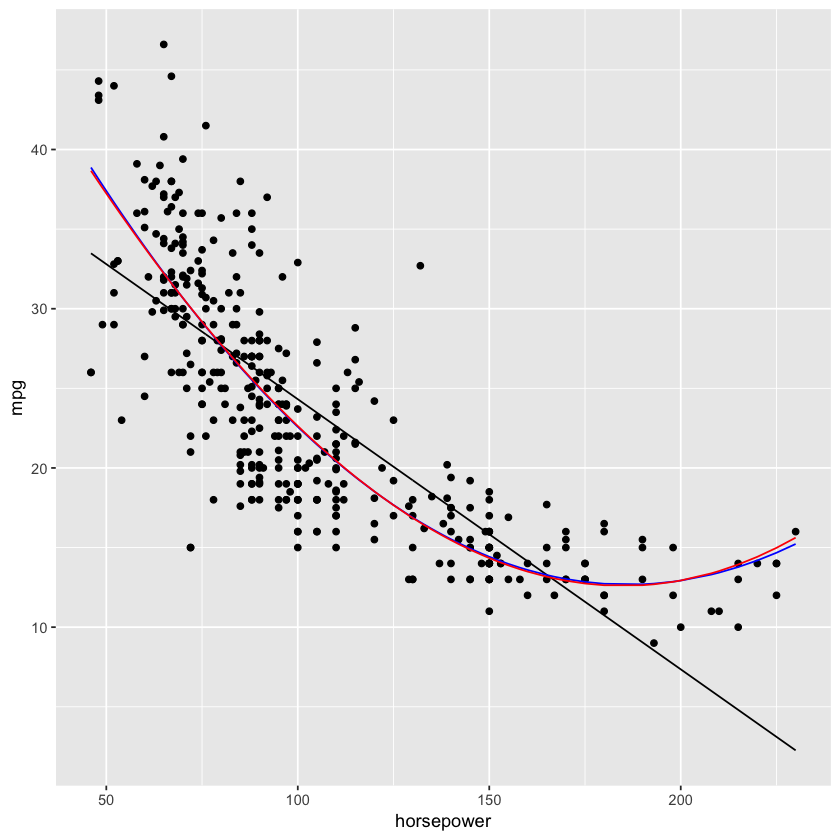

In [21]:
ggplot(data = auto.fit, mapping = aes(x = horsepower, y = mpg)) +
    geom_point() +
    geom_line(aes(horsepower, yhat1)) +
    geom_line(aes(horsepower, yhat2), color = 'blue') +
    geom_line(aes(horsepower, yhat3), color = 'red')

Estimated test error for quadratic model:

In [22]:
mean((mpg - predict(lm.fit2, Auto))[-train]^2)

[1] 18.71646

Estimated test error for cubic model:

In [24]:
mean((mpg - predict(lm.fit3, Auto))[-train]^2)

[1] 18.79401

Because there is randomness in which observations we use as our training and validation sets, if we run the code using a different seed we will get somewhat different results.

In [26]:
set.seed(420)
train = sample(392, 196)
lm.fit <- lm(mpg ~ horsepower, data = Auto, subset = train)
mean((mpg - predict(lm.fit, Auto))[-train]^2)

[1] 23.52529

This estimated test error rate is slightly different from what we got the first time (23.2660086465003).

In [27]:
lm.fit2 <- lm(mpg ~ poly(horsepower, 2), data = Auto, subset = train)
mean((mpg - predict(lm.fit2, Auto))[-train]^2)

[1] 18.20645

In [28]:
lm.fit3 <- lm(mpg ~ poly(horsepower, 3), data = Auto, subset = train)
mean((mpg - predict(lm.fit3, Auto))[-train]^2)

[1] 18.3717

Comparing these results to our initial results, we can see they are all slightly different due to the randomness in selecting the training and validation sets. However, the trend remains the same: The error goes down when we move from the linear model to quadratic, but going to the cubic model didn't seem to help, and in fact slightly increases the estimated test error.

## Leave-One-Out Cross-Validation (LOOCV)

Note: For this part of the lab, we will use `glm()` to fit linear regression models rather than the standard `lm()`. this is because `glm()` can be used together with `cv.glm()` for cross-validation. `cv.glm` is part of the `boot` library.

In [29]:
library(boot)

In [30]:
lin.mod <- glm(mpg ~ horsepower, data = Auto)
cv.error <- cv.glm(Auto, lin.mod)
cv.error$delta

[1] 24.23151 24.23114

`cv.glm()` defaults to LOOCV, rather than k-fold CV. The `delta` vector contains the cross-validation results (estimated test error). The first number is the standarrd k-fold CV estimate. The second is a bias-corrected version. With this particular data set, the two estimates are very similar to each other.

We can repeat the above process for increasingly complex polynomial fits to find the model with the lowest estimated error. We'll use a for loop to do this.

In [32]:
cv.error <- rep(0,5)
for (i in 1:5){
    glm.fit <- glm(mpg ~ poly(horsepower, i), data = Auto)
    cv.error[i] <- cv.glm(Auto, glm.fit)$delta[1]
}
cv.error

[1] 24.23151 19.24821 19.33498 19.42443 19.03321

As before, we can see that adding a quadratic term greatly improves the fit of the model, but adding additional complexity doesn't seem to help at all.

## K-Fold Cross-Validation

`cv.glm()` can also be used for implementing k-fold CV by adding an additional parameter, `K`. Below, we use K = 10. Again, we wish to estimate the error on increasingly complex polynomials.

In [35]:
set.seed(17)
cv.error.10 = rep(0, 5)
for (i in 1:5) {
    glm.fit <- glm(mpg ~ poly(horsepower, i), data = Auto)
    cv.error.10[i] <- cv.glm(Auto, glm.fit, K = 10)$delta[1]
}
cv.error.10

[1] 24.27207 19.26909 19.34805 19.29496 19.03198

Again, we see no evidence that adding any polynomial terms higher than quadratic improves the accuracy of the model.

## The Bootstrap

### Estimating the Accuracy of a Statistic of Interest

To perform the bootstrrap in `R`, there are only two steps. First, we create a function that computes the statistic of interest. Second, we use the `boot()` function to perform the bootstrap by repeateedly sampling observations from the data set (with replacement).

We first create a function, called `alpha.fn()`, which takes as input the data as well as a vector indicating which observations should be used to estimate $\alpha$. The function then outputs the estimatte for $\alpha$ baed on the selected observations. We will be using the `Portfolio` data set.

In [38]:
alpha.fn <- function(data, index) {
    X <- data$X[index]
    Y <- data$Y[index]
    return((var(Y) - cov(X,Y)) / (var(X) + var(Y) - 2*cov(X,Y)))
}

The above function returns an estimate for $\alpha$ to the observations indexed by `index`. For example, the following command tells R to estimate $\alpha$ using all 100 observations:

In [39]:
alpha.fn(Portfolio, 1:100)

[1] 0.5758321

The following command uses the `sample()` function to randomly select 100 observations from the range 1 to 100, with replacemeent. This constructs a new bootstrap data set and recomputes $\hat{\alpha}$ using the 'new' data.

In [40]:
set.seed(1)
alpha.fn(Portfolio, sample(100,100, replace = TRUE))

[1] 0.7368375

We can implement bootstrap analysis to estimate the standard error of $\hat{\alpha}$ by performing this command many times, recording all of the corresponding $\hat{\alpha}$'s, and then computing the resulting standard deviation. The `boot()` function automates this for us. Below we producee 1,000 bootstrap estimates for $\alpha$:

In [41]:
boot(Portfolio, alpha.fn, R = 1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Portfolio, statistic = alpha.fn, R = 1000)


Bootstrap Statistics :
     original       bias    std. error
t1* 0.5758321 -0.001695873  0.09366347

The output above shows that using the original data, $\hat{\alpha}$ = 0.5758321, and that the bootstrap estimate for $SE(\hat{\alpha})$ is 0.09366347

### Estimating the Accuracy of a Linear Regression Model

The bootstrap can also be used to assess the variability of thee coefficient estimatees and predictions from a statistical model. Here we use it to assess the variablity of the estimates for $\beta_0$ and $\beta_1$ for a regression model that predicts `mpg` using `horsepower` in the `Auto` data set.

We start by creating a function, `boot.fn()`, which takes in the `Auto` data set and a set of indices forr the observations, and returns the intercept and slope estimates for the linear regression model. We then apply this function to the full set of 392 observations to compute the estimates of $\beta_0$ and $\beta_1$ on the entire data set using the usual linear regression coefficient estimate formulas.

In [42]:
boot.fn <- function(data, index) {
    return(coef(lm(mpg ~ horsepower, data = data, subset = index)))
}

boot.fn(Auto, 1:392)

(Intercept)  horsepower 
 39.9358610  -0.1578447

We can use our new function to create bootstrap estimatese for the intercept and slope terms by randomly sampling from the original observations with replacement. Here are two examples:

In [43]:
set.seed(1)
boot.fn(Auto, sample(392, 392, replace = TRUE))

(Intercept)  horsepower 
 40.3404517  -0.1634868

In [44]:
boot.fn(Auto, sample(392, 392, replace = TRUE))

(Intercept)  horsepower 
 40.1186906  -0.1577063

Next, we'll use `boot()` to compute the standard errors of 1,000 bootstrap estimates for the intercept and slope terms.

In [45]:
boot(Auto, boot.fn, 1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Auto, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
      original        bias    std. error
t1* 39.9358610  0.0544513229 0.841289790
t2* -0.1578447 -0.0006170901 0.007343073

This shows us that the bootstrap estimate for $SE(\hat{\beta}_0)$ is 0.84, and the bootstrap estimate for $SE(\hat{\beta}_1)$ is 0.0073.

In [46]:
summary(lm(mpg ~ horsepower, data = Auto))$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),39.9358610,0.717498656,55.65984,1.220362e-187
horsepower,-0.1578447,0.006445501,-24.48914,7.031989e-81


Looking at the standard error estimates for the intercept and slope terms output by a call to `lm()`, we can see that the estimatese are slightly different from the ones we obtained using the bootstrap. This is because the formulas to compute the standard errors for linear regression coefficients rely on certain assumptions. For example, they depend on the unknown parameter $\sigma^2$, the irreducible error, which is estimated using the RSS. Because thee estimate for $\sigma^2$ relies n the linear model being correct, which in this case it is not. This leads to somewhat inaccurate estimates of the standard errors of the intercept and slope estimates. The bootstrap, on the other hand, does not rely n any assumptions, so it is likely giving a more accurate estimate of the standard errors of $\hat{\beta}_0$ and $\hat{\beta}_1$ than the onew we are getting from the `summary()` function.

Below we compute the bootstrap standard error estimates and the standard linear regression estimates that result form fitting the quadratic model to the data. Since this model provides a better fit to the data than the simple linear model, there should be a better correspondence between the bootstrap estimates and standard estimates of $SE(\hat{\beta}_0)$, $SE(\hat{\beta}_1)$, and $SE(\hat{\beta}_2)$.

In [48]:
boot.fn <- function(data, index) {
    return(coef(lm(mpg ~ horsepower + I(horsepower^2), data = data, subset = index)))
}
set.seed(1)
boot(Auto, boot.fn, 1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Auto, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
        original        bias     std. error
t1* 56.900099702  3.511640e-02 2.0300222526
t2* -0.466189630 -7.080834e-04 0.0324241984
t3*  0.001230536  2.840324e-06 0.0001172164

In [49]:
summary(lm(mpg ~ horsepower + I(horsepower^2), data = Auto))$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),56.900099702,1.8004268063,31.60367,1.740911e-109
horsepower,-0.466189630,0.0311246171,-14.97816,2.289429e-40
I(horsepower^2),0.001230536,0.0001220759,10.08009,2.196340e-21
